In [22]:
using
    DataFrames,
    Arrow,
    CSV,
    Plots

In [1]:
include("shared/CommonConstants.jl")
include("shared/CommonFunctions.jl")
include("shared/DataInit.jl")
using
    .CommonFunctions,
    .CommonConstants,
    .DataInit

In [10]:
NOTEBOOK_DIRS = NamedTuple(
    name=>joinpath("..", path) for (name, path) in pairs(DIRS)
)

(fund = "..\\data/mutual-funds", currency = "..\\data/currencies", equity = "..\\data/equities", map = "..\\data/mappings")

In [16]:
currency_file = joinpath(
    NOTEBOOK_DIRS.currency, "combined/currency_rates.arrow"
)

"..\\data/currencies\\combined/currency_rates.arrow"

Load in and check the currencies used.

In [18]:
currency_data = Arrow.Table(currency_file) |> DataFrame
first(currency_data,2)

Row,cur_code,date,spot_bid,forward_bid,spot_mid,forward_mid,spot_ask,forward_ask
,String,Date,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,AED,1995-06-30,3.6725,3.6715,3.6728,3.67235,3.673,3.6732
2,AED,1995-07-31,3.6726,3.6716,3.673,3.6726,3.6734,3.6736


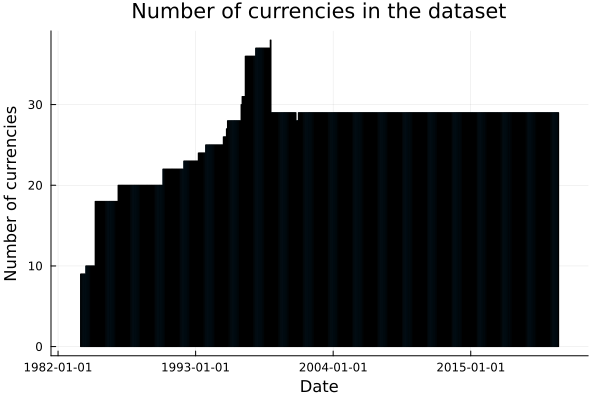

In [23]:
n_currencies_by_date = groupby(
    currency_data, :date
) |> df->combine(
    df, :cur_code => (x->length(unique(x))) => :n_currencies
) |> df->sort(df, :date);

In [34]:
n_currencies_by_date

Row,date,n_currencies
,Date,Int64
1,1983-10-31,9
2,1983-11-30,9
3,1983-12-31,9
4,1984-01-31,9
5,1984-02-29,9
6,1984-03-31,10
7,1984-04-30,10
8,1984-05-31,10
9,1984-06-30,10


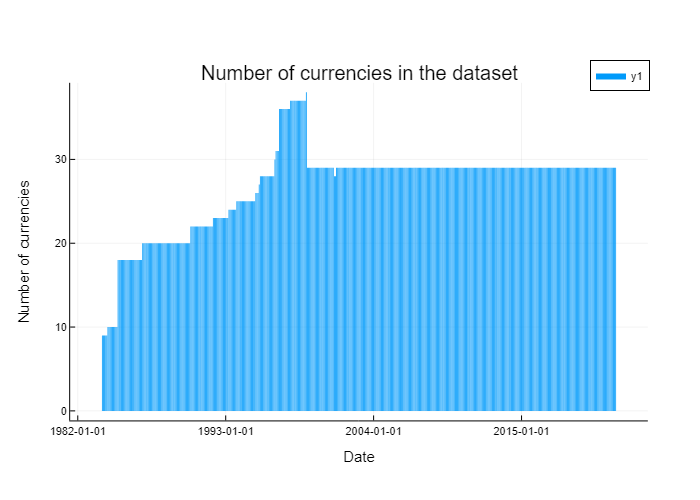

In [47]:
using PlotlyJS

plotlyjs()
plot(
    n_currencies_by_date.date,
    n_currencies_by_date.n_currencies,
    seriestype=:bar,
    linecolor=nothing,
    size=(1100, 400),
    xlabel="Date",
    ylabel="Number of currencies",
    title="Number of currencies in the dataset"
)